In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value
from toolbox.phot import *
import hhana
cosmo = FlatLambdaCDM(70.0, 0.3)

In [62]:
SFR = lambda Lnu: 1.4e-28*(Lnu/(u.erg/u.s/u.Hz)).decompose()*u.Msun/u.s
LHalpha = lambda sfr: sfr/(7.9e-42)*(u.erg/u.s)/(u.Msun/u.s)

In [82]:
hugs = hhana.SuperCat('hsc-hugs')

In [48]:
sample = Table.read('../../data/proposals/gemini_FT_4-2017/gemini-ft-sample.csv')
abs_mag_low = absolute_magnitude(sample['nuv_mag'], D_L=25*u.Mpc)
abs_mag_high = absolute_magnitude(sample['nuv_mag'], D_L=100*u.Mpc)
Lnu_low = Lnu_from_AB_mag(abs_mag_low)
Lnu_high = Lnu_from_AB_mag(abs_mag_high)

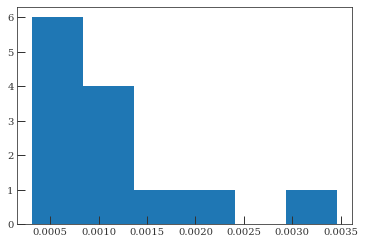

In [49]:
plt.hist(SFR(Lnu_low), bins='auto');

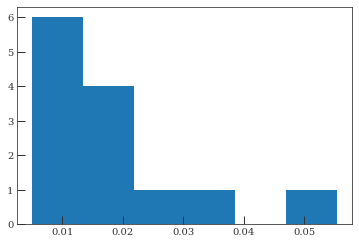

In [51]:
plt.hist(SFR(Lnu_high), bins='auto');

In [74]:
dist = 25.0*u.Mpc
OII_low = LHalpha(SFR(Lnu_low))/(4*np.pi*dist.to('cm')**2)/10

dist = 100.0*u.Mpc
OII_high = LHalpha(SFR(Lnu_high))/(4*np.pi*dist.to('cm')**2)/10

sample['L(O[II], 25 Mpc)'] = OII_low
sample['L(O[II], 100 Mpc)'] = OII_high

In [79]:
sample['hugs-id', 'mu_aper_0(g)', 'nuv_mag', 'nuv_magerr', 'L(O[II], 25 Mpc)']

hugs-id,mu_aper_0(g),nuv_mag,nuv_magerr,"L(O[II], 25 Mpc)"
,,,,erg / (cm2 s)
float64,float64,float64,float64,float64
27.0,24.1234773856,20.53348,0.2264893,3.93648811341e-16
118.0,24.6584773856,21.39005,0.3130894,1.78846705452e-16
212.0,24.1542773856,22.69895,0.1503454,5.35699134106e-17
119.0,24.3187773856,22.02215,0.1899373,9.99173585568e-17
230.0,25.2759773856,21.46568,0.3833653,1.66812635686e-16
215.0,24.3998773856,21.01833,0.06860986,2.51865651683e-16
138.0,24.3729773856,21.4964,0.42163,1.62158957769e-16
139.0,24.4980773856,21.78429,0.1232799,1.2438985008e-16


In [ ]:
targets = [139, 173, 158, 

In [93]:
hugs[hugs['hugs-id']==27]['ra', 'dec', 'n', 'r_e(g)']

ra,dec,n,r_e(g)
float64,float64,float64,float64
39.4811965279,-6.2565849096,0.743127,7.8863736


In [94]:
hhana.hsc_map(39.4811965279, -6.2565849096)